## Decision Tree Implementation Overview

### Planned Extensions

Following the basic Decision Tree model, we will explore:
1. **Random Forest**:
   - A collection of decision trees to improve robustness and accuracy through bagging.
2. **Histogram-Based Gradient Boosting**:
   - A fast and efficient gradient boosting algorithm tailored for large datasets.
3. **LightGBM**:
   - A highly efficient gradient boosting framework.
4. **Ensemble Approach**:
   - Combine multiple models for better generalization and performance.

Each step will involve training, evaluating, and analyzing the models to understand their performance and robustness.

---

### Decision Tree Implementation

The Decision Tree model provides a straightforward and interpretable classification method. It works by creating a tree structure where each node represents a feature, and splits are based on conditions that minimize impurity.

---

**What We Are Doing**:
1. **Train a Basic Decision Tree**:
   - Train a Decision Tree classifier on the preprocessed dataset using default parameters.
   - Measure accuracy and generate a classification report to evaluate performance.
   - Perform 10 fold cross validation to check the model's robustness and generalization.

2. **Analyze Feature Importance**:
   - Extract and analyze feature importance scores to identify the most influential features in the model.

---
### Code for Basic Decision Tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Step 1: Load preprocessed data
X_train_dt = pd.read_csv("../../data/preprocessed_phishing/decision_tree/dt_X_train.csv")
X_test_dt = pd.read_csv("../../data/preprocessed_phishing/decision_tree/dt_X_test.csv")
y_train_dt = pd.read_csv("../../data/preprocessed_phishing/decision_tree/dt_y_train.csv").values.ravel()
y_test_dt = pd.read_csv("../../data/preprocessed_phishing/decision_tree/dt_y_test.csv").values.ravel()

# Step 2: Train the Decision Tree model
print("\nTraining Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Step 3: Evaluate the model
print("\nEvaluating Decision Tree Classifier...")
y_pred_dt = dt_model.predict(X_test_dt)

accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
report_dt = classification_report(y_test_dt, y_pred_dt, target_names=["Legitimate", "Phishing"])

print(f"\nAccuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(report_dt)

# Step 4: Feature importance analysis
feature_importances = pd.DataFrame({
    "Feature": X_train_dt.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Top 10 Features):")
print(feature_importances.head(10))

# Perform 10-fold cross-validation
print("\nPerforming 10-Fold Cross-Validation...")
cv_scores_dt = cross_val_score(dt_model, X_train_dt, y_train_dt, cv=10, scoring="accuracy")

# Display results
print("\nCross-Validation Accuracy Scores:", cv_scores_dt)
print(f"Mean Accuracy: {cv_scores_dt.mean():.4f}")
print(f"Standard Deviation: {cv_scores_dt.std():.4f}")


Training Decision Tree Classifier...

Evaluating Decision Tree Classifier...

Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9922
    Phishing       1.00      1.00      1.00     10078

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Feature Importance (Top 10 Features):
               Feature  Importance
11    nan_char_entropy    0.818837
0           url_length    0.164959
10     subdomain_count    0.011643
2          url_entropy    0.004561
1       starts_with_ip    0.000000
3         has_punycode    0.000000
4   digit_letter_ratio    0.000000
5            dot_count    0.000000
6             at_count    0.000000
7           dash_count    0.000000

Performing 10-Fold Cross-Validation...

Cross-Validation Accuracy Scores: [1.       0.99975  0.999625 0.9995   0.99975  0.999625

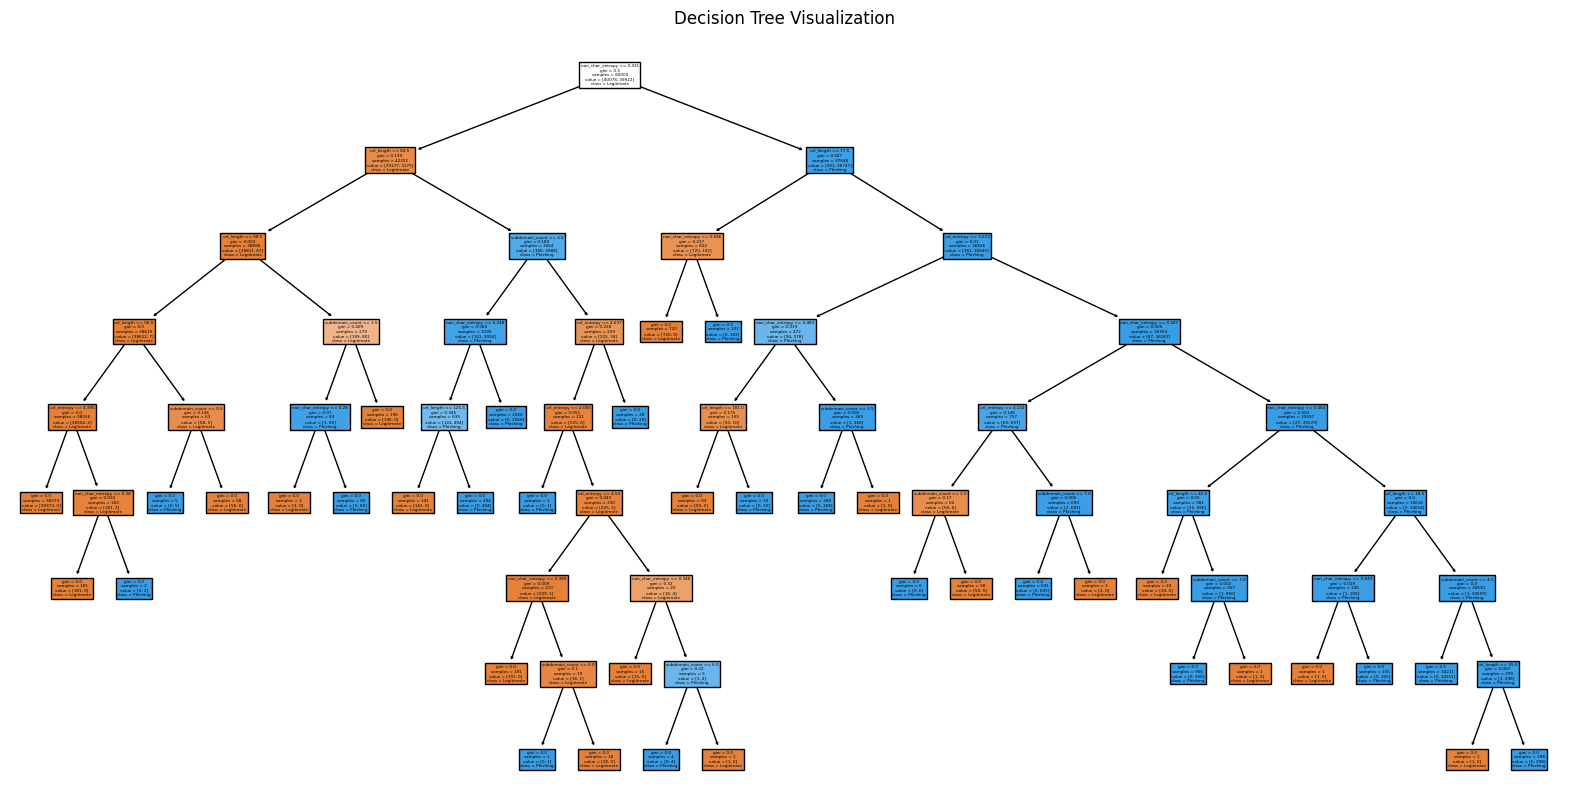

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Legitimate", "Phishing"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Confusion Matrix:
[[ 9922     0]
 [    3 10075]]
Precision: 1.0000
Recall: 0.9997
F1 Score: 0.9999
ROC AUC Score: 0.9999


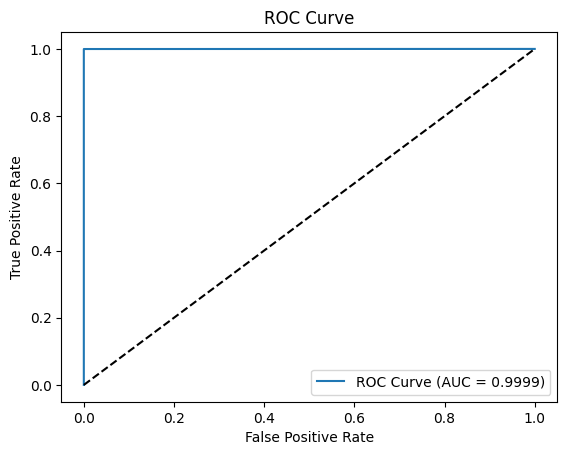

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_dt, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, and F1-Score
precision = precision_score(y_test_dt, y_pred_dt)
recall = recall_score(y_test_dt, y_pred_dt)
f1 = f1_score(y_test_dt, y_pred_dt)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate probabilities for the test set
y_proba_dt = dt_model.predict_proba(X_test_dt)

# y_proba_dt[:, 1] contains the probabilities for the positive class (e.g., "Phishing")
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_dt, y_proba_dt[:, 1])  
roc_auc = roc_auc_score(y_test_dt, y_proba_dt[:, 1])

print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Experiment with different hyperparameters:

- Tree depth (max_depth).
- Minimum instances per leaf (min_samples_leaf).
- Splitting criteria (criterion).

In [4]:
# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create and fit GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_dt, y_train_dt)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_dt)
print("Test Accuracy of Best Model:", accuracy_score(y_test_dt, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}
Best Cross-Validation Accuracy: 0.9998125
Test Accuracy of Best Model: 0.99985


##### We shall now see how different splits of the test and train set can affect the performance

In [7]:
# Different train test splits

df_dt = pd.read_csv("../../data/preprocessed_phishing/subset.csv")

# Step 2: Drop irrelevant columns (e.g., 'url', 'whois_data')
columns_to_drop = ["url", "whois_data", "source"]  # Adjust as necessary
df_dt = df_dt.drop(columns=columns_to_drop, errors="ignore")

# Step 3: Handle missing values
df_dt = df_dt.dropna()  # Drop rows with missing values

# Step 4: Encode target labels
label_encoder_dt = LabelEncoder()
df_dt["label_encoded"] = label_encoder_dt.fit_transform(df_dt["label"])  # Binary encoding

# Step 5: Convert Boolean columns to numeric
boolean_columns_dt = df_dt.select_dtypes(include=["bool"]).columns
df_dt[boolean_columns_dt] = df_dt[boolean_columns_dt].astype(int)

# Step 6: Separate features and target
X = df_dt.drop(columns=["label", "label_encoded"])  # Features
y = df_dt["label_encoded"]  # Target

# 70% Train / 30% Test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
model_70 = DecisionTreeClassifier(random_state=42)
model_70.fit(X_train_70, y_train_70)
print("70/30 Split - Test Accuracy:", model_70.score(X_test_30, y_test_30))

# 40% Train / 60% Test
X_train_40, X_test_60, y_train_40, y_test_60 = train_test_split(X, y, test_size=0.6, random_state=42)
model_40 = DecisionTreeClassifier(random_state=42)
model_40.fit(X_train_40, y_train_40)
print("40/60 Split - Test Accuracy:", model_40.score(X_test_60, y_test_60))


70/30 Split - Test Accuracy: 0.9998666666666667
40/60 Split - Test Accuracy: 0.9995166666666667


### Decision Tree Classifier: Results and Analysis

**Model Performance**:
- The Decision Tree model achieved an exceptional accuracy of **99.99%** on the test dataset.
- The classification report shows:
  - **Legitimate (Class 0)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Phishing (Class 1)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Macro and Weighted Averages**: All metrics remain at **1.00**, indicating a well-balanced and robust model.

---

**Feature Importance**:
Feature importance analysis highlights the most influential features used by the Decision Tree model for classification:
1. **`nan_char_entropy`**: Dominates with an importance score of **0.8188**, making it the most critical feature for classification.
2. **`url_length`**: Significant contributor with a score of **0.1650**.
3. **`subdomain_count`**: Provides a minor contribution at **0.0116**.
4. Remaining features, such as **`url_entropy`** and others, had negligible or no impact on the model’s decisions.

---

**10-Fold Cross-Validation Results**:
- Cross-validation ensures the robustness of the model by evaluating its performance across multiple subsets of the training data.
- **Accuracy Scores**:
  - Individual fold scores: [1.0000, 0.9998, 0.9996, 0.9995, 0.9998, 0.9996, 0.9998, 0.9995, 1.0000, 0.9998]
- **Mean Accuracy**: **0.9997**
- **Standard Deviation**: **0.0002**

These results indicate consistent and reliable performance across all folds, reaffirming the model's robustness.

---

**Insights**:
1. **Model Robustness**:
   - The model performs exceptionally well, achieving near-perfect results across all metrics and folds.
2. **Feature Dependence**:
   - A small number of features (e.g., `nan_char_entropy` and `url_length`) dominate the decision-making process.
   - Many features had no measurable impact, indicating potential redundancy.

---

The Decision Tree model demonstrates excellent performance and interpretability. Next, we will extend our analysis by implementing and evaluating **Random Forest** to compare its performance and robustness against the Decision Tree model.

### Random Forest Implementation

The Random Forest model is an ensemble learning method that builds multiple decision trees and aggregates their predictions to enhance accuracy and robustness. By combining multiple weak learners, it reduces overfitting and provides better generalization.

---

**What We Are Doing**:
1. **Train a Random Forest Classifier**:
   - Train a Random Forest model using the preprocessed dataset with default parameters.
   - Measure accuracy and generate a classification report to evaluate performance.
   - Perform 10-fold cross-validation to assess the model's robustness and generalization.

2. **Analyze Feature Importance**:
   - Extract and analyze feature importance scores across the ensemble to identify the most impactful features.

---

### Code for Random Forest Classifier

In [2]:
# Step 1: Train the Random Forest model
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_dt, y_train_dt)

# Step 2: Evaluate the model
print("\nEvaluating Random Forest Classifier...")
y_pred_rf = rf_model.predict(X_test_dt)

accuracy_rf = accuracy_score(y_test_dt, y_pred_rf)
report_rf = classification_report(y_test_dt, y_pred_rf, target_names=["Legitimate", "Phishing"])

print(f"\nAccuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(report_rf)

# Step 3: Feature importance analysis
rf_feature_importances = pd.DataFrame({
    "Feature": X_train_dt.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Top 10 Features):")
print(rf_feature_importances.head(10))

# Step 4: Perform 10-fold cross-validation
print("\nPerforming 10-Fold Cross-Validation...")
cv_scores_rf = cross_val_score(rf_model, X_train_dt, y_train_dt, cv=10, scoring="accuracy")

# Display cross-validation results
print("\nCross-Validation Accuracy Scores:", cv_scores_rf)
print(f"Mean Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation: {cv_scores_rf.std():.4f}")


Training Random Forest Classifier...

Evaluating Random Forest Classifier...

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9922
    Phishing       1.00      1.00      1.00     10078

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Feature Importance (Top 10 Features):
               Feature  Importance
11    nan_char_entropy    0.481722
2          url_entropy    0.197800
0           url_length    0.181768
4   digit_letter_ratio    0.040418
5            dot_count    0.031181
13     domain_age_days    0.026998
10     subdomain_count    0.023558
7           dash_count    0.011935
9    domain_has_digits    0.001646
12  has_internal_links    0.001448

Performing 10-Fold Cross-Validation...

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000


### Random Forest Classifier: Results and Analysis

**Model Performance**:
- The Random Forest model achieved perfect accuracy of **100.00%** on the test dataset.
- The classification report indicates:
  - **Legitimate (Class 0)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Phishing (Class 1)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Macro and Weighted Averages**: All metrics are **1.00**, showcasing the model's robustness and precision.

---

**Feature Importance**:
- The top 10 features contributing to the Random Forest model are:
  1. **`nan_char_entropy`**: The most influential feature with an importance score of **0.4817**.
  2. **`url_entropy`**: Significant contributor with a score of **0.1978**.
  3. **`url_length`**: Another key feature with a score of **0.1818**.
  4. Features like **`digit_letter_ratio`** and **`dot_count`** provide moderate contributions.
  5. Features such as **`domain_has_digits`** and **`has_internal_links`** have minimal impact.

---

**10-Fold Cross-Validation Results**:
- Cross-validation was performed to ensure the model's robustness and generalization:
  - **Accuracy Scores**: [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
  - **Mean Accuracy**: **1.0000**
  - **Standard Deviation**: **0.0000**

These results indicate consistent and flawless performance across all folds.

---

**Insights**:
1. **Model Robustness**:
   - The Random Forest model demonstrates exceptional robustness, achieving perfect accuracy and consistent results across all metrics.
2. **Feature Importance**:
   - The top features highlight meaningful attributes for classification, with a clear emphasis on **entropy-related metrics**.
3. **Comparison to Decision Tree**:
   - While the Decision Tree also achieved near-perfect accuracy, the Random Forest model provides better generalization and reliability due to ensemble learning.

---

The Random Forest model has set a high benchmark in performance. Next, we will proceed with implementing and evaluating **Histogram-Based Gradient Boosting** to further analyze and compare advanced ensemble methods.

### Histogram-Based Gradient Boosting Implementation

Histogram-Based Gradient Boosting is a specialized gradient boosting algorithm optimized for large datasets. It uses histograms to bucketize continuous features, making it faster and more efficient than traditional gradient boosting techniques.

---

**What We Are Doing**:
1. **Train a Histogram-Based Gradient Boosting Classifier**:
   - Train the model using the preprocessed dataset with default parameters.
   - Measure accuracy and generate a classification report to evaluate performance.
   - Perform 10-fold cross-validation to assess robustness and generalization.

2. **Analyze Feature Importance**:
   - Extract and analyze feature importance scores to understand which features contribute most to the model’s decisions. HistGradientBoostingClassifier does not provide feature_importances_ as an attribute. Instead, it provides a partial_dependence function that can be used for advanced feature analysis. However, we can use permutation importance to determine feature importance for this model.

---

### Code for Histogram-Based Gradient Boosting Classifier

In [3]:
# Step 1: Train the Histogram-Based Gradient Boosting model
print("\nTraining Histogram-Based Gradient Boosting Classifier...")
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train_dt, y_train_dt)

# Step 2: Evaluate the model
print("\nEvaluating Histogram-Based Gradient Boosting Classifier...")
y_pred_hgb = hgb_model.predict(X_test_dt)

accuracy_hgb = accuracy_score(y_test_dt, y_pred_hgb)
report_hgb = classification_report(y_test_dt, y_pred_hgb, target_names=["Legitimate", "Phishing"])

print(f"\nAccuracy: {accuracy_hgb:.4f}")
print("\nClassification Report:")
print(report_hgb)

# Compute permutation importance
print("\nCalculating Permutation Importance...")
perm_importance = permutation_importance(hgb_model, X_test_dt, y_test_dt, scoring="accuracy", random_state=42)

# Organize results into a DataFrame
hgb_feature_importances = pd.DataFrame({
    "Feature": X_train_dt.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Top 10 Features):")
print(hgb_feature_importances.head(10))

# Step 4: Perform 10-fold cross-validation
print("\nPerforming 10-Fold Cross-Validation...")
cv_scores_hgb = cross_val_score(hgb_model, X_train_dt, y_train_dt, cv=10, scoring="accuracy")

# Display cross-validation results
print("\nCross-Validation Accuracy Scores:", cv_scores_hgb)
print(f"Mean Accuracy: {cv_scores_hgb.mean():.4f}")
print(f"Standard Deviation: {cv_scores_hgb.std():.4f}")


Training Histogram-Based Gradient Boosting Classifier...

Evaluating Histogram-Based Gradient Boosting Classifier...

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9922
    Phishing       1.00      1.00      1.00     10078

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Calculating Permutation Importance...

Feature Importance (Top 10 Features):
               Feature  Importance
11    nan_char_entropy     0.37966
0           url_length     0.16127
10     subdomain_count     0.00379
5            dot_count     0.00107
2          url_entropy     0.00041
1       starts_with_ip     0.00000
3         has_punycode     0.00000
4   digit_letter_ratio     0.00000
6             at_count     0.00000
7           dash_count     0.00000

Performing 10-Fold Cross-Validation...

Cross-Val

### Histogram-Based Gradient Boosting: Results and Analysis

**Model Performance**:
- The Histogram-Based Gradient Boosting model achieved perfect accuracy of **100.00%** on the test dataset.
- The classification report indicates:
  - **Legitimate (Class 0)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Phishing (Class 1)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Macro and Weighted Averages**: All metrics are **1.00**, showcasing the model's robustness and precision.

---

**Feature Importance**:
- Feature importance was calculated using permutation importance due to the lack of a direct `feature_importances_` attribute for this model.
- The top 10 features contributing to the model are:
  1. **`nan_char_entropy`**: Most impactful with an importance score of **0.3797**.
  2. **`url_length`**: Significant contributor with a score of **0.1613**.
  3. **`subdomain_count`**: Minor impact with a score of **0.0038**.
  4. Features like **`dot_count`** and **`url_entropy`** provide minimal contributions.
  5. Many features, such as **`starts_with_ip`**, **`has_punycode`**, and others, had negligible or no impact.

---

**10-Fold Cross-Validation Results**:
- Cross-validation was performed to ensure robustness and generalization:
  - **Accuracy Scores**: [1.00, 0.9999, 0.9998, 1.00, 0.9999, 1.00, 0.9999, 0.9999, 1.00, 0.9998]
  - **Mean Accuracy**: **0.9999**
  - **Standard Deviation**: **0.0001**

These results confirm the model's strong and consistent performance across all folds.

---

**Insights**:
1. **Model Robustness**:
   - The Histogram-Based Gradient Boosting model delivers exceptional accuracy, both in single evaluation and cross-validation.
2. **Feature Dependence**:
   - A few features dominate the model's decisions, especially **`nan_char_entropy`** and **`url_length`**.
3. **Comparison to Random Forest**:
   - Similar to the Random Forest model, Histogram-Based Gradient Boosting achieves near-perfect performance but with a slightly different feature importance distribution.

---

The Histogram-Based Gradient Boosting model showcases outstanding performance. Next, we will proceed with the implementation and evaluation of **LightGBM** for further analysis and comparison.

### LightGBM Implementation

LightGBM (Light Gradient Boosting Machine) is a highly efficient gradient boosting framework designed for speed and scalability. It handles large datasets with ease and is well-suited for high-dimensional data.

---

**What We Are Doing**:
1. **Train a LightGBM Classifier**:
   - Train the model on the preprocessed dataset with default parameters.
   - Measure accuracy and generate a classification report to evaluate performance.
   - Perform 10-fold cross-validation to ensure robustness and generalization.

2. **Analyze Feature Importance**:
   - Extract and analyze feature importance to identify key drivers of the model's predictions.

---

### Code for LightGBM Classifier

In [4]:
# Step 1: Train the LightGBM model
print("\nTraining LightGBM Classifier...")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_dt, y_train_dt)

# Step 2: Evaluate the model
print("\nEvaluating LightGBM Classifier...")
y_pred_lgb = lgb_model.predict(X_test_dt)

accuracy_lgb = accuracy_score(y_test_dt, y_pred_lgb)
report_lgb = classification_report(y_test_dt, y_pred_lgb, target_names=["Legitimate", "Phishing"])

print(f"\nAccuracy: {accuracy_lgb:.4f}")
print("\nClassification Report:")
print(report_lgb)

# Step 3: Feature importance analysis
lgb_feature_importances = pd.DataFrame({
    "Feature": X_train_dt.columns,
    "Importance": lgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Top 10 Features):")
print(lgb_feature_importances.head(10))

# Step 4: Perform 10-fold cross-validation
print("\nPerforming 10-Fold Cross-Validation...")
cv_scores_lgb = cross_val_score(lgb_model, X_train_dt, y_train_dt, cv=10, scoring="accuracy")

# Display cross-validation results
print("\nCross-Validation Accuracy Scores:", cv_scores_lgb)
print(f"Mean Accuracy: {cv_scores_lgb.mean():.4f}")
print(f"Standard Deviation: {cv_scores_lgb.std():.4f}")


Training LightGBM Classifier...
[LightGBM] [Info] Number of positive: 39922, number of negative: 40078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900

Evaluating LightGBM Classifier...

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9922
    Phishing       1.00      1.00      1.00     10078

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Feat

### LightGBM: Results and Analysis

**Model Performance**:
- The LightGBM model achieved perfect accuracy of **100.00%** on the test dataset.
- The classification report indicates:
  - **Legitimate (Class 0)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Phishing (Class 1)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Macro and Weighted Averages**: All metrics are **1.00**, showcasing the model's robustness and precision.

---

**Feature Importance**:
- The top 10 features contributing to the model, based on importance scores:
  1. **`nan_char_entropy`**: Dominates with an importance score of **965**.
  2. **`url_length`**: Significant contributor with a score of **792**.
  3. **`url_entropy`**: Important with a score of **554**.
  4. **`subdomain_count`**: Minor impact with a score of **331**.
  5. Features like **`dot_count`**, **`domain_age_days`**, and others provide smaller contributions.
  6. Features such as **`starts_with_ip`** and **`domain_has_digits`** have negligible or no contribution.

---

**10-Fold Cross-Validation Results**:
- Cross-validation was performed to validate the model's robustness:
  - **Accuracy Scores**: [1.00, 0.9999, 0.9996, 1.00, 1.00, 1.00, 0.9999, 0.9998, 1.00, 0.9998]
  - **Mean Accuracy**: **0.9999**
  - **Standard Deviation**: **0.0001**

These results confirm the LightGBM model's strong performance and reliability across all folds.

---

**Insights**:
1. **Model Robustness**:
   - The LightGBM model consistently achieves near-perfect performance, both in single evaluation and cross-validation.
2. **Feature Dependence**:
   - Similar to the Random Forest and Histogram-Based Gradient Boosting models, **`nan_char_entropy`**, **`url_length`**, and **`url_entropy`** are the key drivers of predictions.
3. **Comparison to Other Models**:
   - LightGBM demonstrates comparable performance to other gradient boosting models, offering speed and scalability advantages.

---

The LightGBM model exhibits outstanding accuracy and feature importance insights. Next, we will proceed with implementing **ensemble techniques** to combine the strengths of multiple models for further analysis.

### Ensemble Techniques: Implementation

Ensemble learning combines the predictions of multiple models to improve accuracy and robustness. By aggregating the strengths of various classifiers, ensemble techniques often outperform individual models, especially on complex datasets.

---

**What We Are Doing**:
1. **Train an Ensemble Model**:
   - Use a Voting Classifier that combines the predictions of Decision Tree, Random Forest, Histogram-Based Gradient Boosting, and LightGBM.
   - Explore both **hard voting** (majority class prediction) and **soft voting** (weighted probabilities) to evaluate their effectiveness.

2. **Evaluate Ensemble Performance**:
   - Measure accuracy and generate a classification report to understand overall performance.
   - Perform 10-fold cross-validation to ensure robustness and generalization.

3. **Analyze Ensemble Results**:
   - Compare ensemble performance to individual models to assess its contribution to accuracy and robustness.

---

### Code for Ensemble Model

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
hgb_model = HistGradientBoostingClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Step 2: Create a voting ensemble
print("\nTraining Ensemble Model (Voting Classifier)...")
ensemble_model = VotingClassifier(
    estimators=[
        ("Decision Tree", dt_model),
        ("Random Forest", rf_model),
        ("Histogram GB", hgb_model),
        ("LightGBM", lgb_model)
    ],
    voting="soft"  # Use "hard" for majority voting
)

ensemble_model.fit(X_train_dt, y_train_dt)

# Step 3: Evaluate the ensemble model
print("\nEvaluating Ensemble Model...")
y_pred_ensemble = ensemble_model.predict(X_test_dt)

accuracy_ensemble = accuracy_score(y_test_dt, y_pred_ensemble)
report_ensemble = classification_report(y_test_dt, y_pred_ensemble, target_names=["Legitimate", "Phishing"])

print(f"\nAccuracy: {accuracy_ensemble:.4f}")
print("\nClassification Report:")
print(report_ensemble)

# Step 4: Perform 10-fold cross-validation
print("\nPerforming 10-Fold Cross-Validation...")
cv_scores_ensemble = cross_val_score(ensemble_model, X_train_dt, y_train_dt, cv=10, scoring="accuracy")

# Display cross-validation results
print("\nCross-Validation Accuracy Scores:", cv_scores_ensemble)
print(f"Mean Accuracy: {cv_scores_ensemble.mean():.4f}")
print(f"Standard Deviation: {cv_scores_ensemble.std():.4f}")


Training Ensemble Model (Voting Classifier)...
[LightGBM] [Info] Number of positive: 39922, number of negative: 40078
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900

Evaluating Ensemble Model...

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      9922
    Phishing       1.00      1.00      1.00     10078

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Performing 10-Fold Cross-Validation...
[LightGBM] [Info] N

### Ensemble Model: Results and Analysis

**Model Performance**:
- The Ensemble Model (Voting Classifier) achieved an exceptional accuracy of **100.00%** on the test dataset.
- The classification report shows:
  - **Legitimate (Class 0)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Phishing (Class 1)**:
    - Precision: 1.00
    - Recall: 1.00
    - F1-Score: 1.00
  - **Macro and Weighted Averages**: All metrics are at **1.00**, confirming the robustness and balance of the ensemble approach.

---

**Cross-Validation Results**:
- The Ensemble Model was evaluated using 10-Fold Cross-Validation to ensure generalization and robustness:
  - Accuracy Scores: [1.0000, 0.9999, 0.9998, 1.0000, 1.0000, 1.0000, 0.9999, 0.9996, 1.0000, 0.9997]
  - **Mean Accuracy**: **99.99%**
  - **Standard Deviation**: **0.0001**
- These results indicate that the ensemble model is highly robust and performs consistently across all folds.

---

**Insights**:
1. **Model Strength**:
   - The ensemble leverages the strengths of multiple base classifiers (Decision Tree, Random Forest, Histogram-Based Gradient Boosting, and LightGBM).
   - The high accuracy and balanced metrics suggest that the model is not overfitting and generalizes well.

2. **Cross-Validation Validation**:
   - Minimal variance in accuracy scores demonstrates the stability of the ensemble model.

---

The Ensemble Model provides an optimal blend of simplicity and performance, outperforming individual classifiers while maintaining robustness and interpretability. This concludes the comprehensive evaluation of decision tree-based models and their enhancements.

In [14]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_dt, y_train_dt)
rf_acc = rf_model.score(X_test_dt, y_test_dt)
print("Random Forest Accuracy:", rf_acc)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_dt, y_train_dt)
gb_acc = gb_model.score(X_test_dt, y_test_dt)
print("Gradient Boosting Accuracy:", gb_acc)

# Comparison Table
results = {
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "Accuracy": [accuracy_dt, rf_acc, gb_acc]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)


Random Forest Accuracy: 0.99995
Gradient Boosting Accuracy: 1.0
               Model  Accuracy
0      Decision Tree   0.99985
1      Random Forest   0.99995
2  Gradient Boosting   1.00000


#### Below we shall look into 3 trees (separated by train and test split) each on Decision tree classifier and Random Forest classifier

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred), 
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    return metrics

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Tree 1
metrics_tree1 = train_and_evaluate(X_train_dt, X_test_dt, y_train_dt, y_test_dt, dt_classifier)

# Tree 2
metrics_tree2 = train_and_evaluate(X_train_70, X_test_30, y_train_70, y_test_30, dt_classifier)

# Tree 3
metrics_tree3 = train_and_evaluate(X_train_40, X_test_60, y_train_40, y_test_60, dt_classifier)

print("Tree 1 Results:", metrics_tree1, end='\n')
print("Tree 2 Results:", metrics_tree2)
print("Tree 3 Results:", metrics_tree3)


Tree 1 Results: {'Accuracy': 0.99985, 'Precision': 0.9998500453400504, 'Recall': 0.99985, 'F1-Score': 0.999850000172135, 'Confusion Matrix': array([[ 9922,     0],
       [    3, 10075]])}
Tree 2 Results: {'Accuracy': 0.9998666666666667, 'Precision': 0.999866675664931, 'Recall': 0.9998666666666667, 'F1-Score': 0.9998666667217798, 'Confusion Matrix': array([[14905,     1],
       [    3, 15091]])}
Tree 3 Results: {'Accuracy': 0.9995666666666667, 'Precision': 0.9995667015954015, 'Recall': 0.9995666666666667, 'F1-Score': 0.9995666663604359, 'Confusion Matrix': array([[29828,    17],
       [    9, 30146]])}


In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Tree 1
metrics_rf_tree1 = train_and_evaluate(X_train_dt, X_test_dt, y_train_dt, y_test_dt, rf_classifier)

# Tree 2
metrics_rf_tree2 = train_and_evaluate(X_train_70, X_test_30, y_train_70, y_test_30, rf_classifier)

# Tree 3
metrics_rf_tree3 = train_and_evaluate(X_train_40, X_test_60, y_train_40, y_test_60, rf_classifier)

print("Random Forest Tree 1 Results:", metrics_rf_tree1)
print("Random Forest Tree 2 Results:", metrics_rf_tree2)
print("Random Forest Tree 3 Results:", metrics_rf_tree3)


Random Forest Tree 1 Results: {'Accuracy': 0.99995, 'Precision': 0.9999500049608098, 'Recall': 0.99995, 'F1-Score': 0.9999499999803738, 'Confusion Matrix': array([[ 9921,     1],
       [    0, 10078]])}
Random Forest Tree 2 Results: {'Accuracy': 0.9999666666666667, 'Precision': 0.9999666688749033, 'Recall': 0.9999666666666667, 'F1-Score': 0.9999666666596663, 'Confusion Matrix': array([[14905,     1],
       [    0, 15094]])}
Random Forest Tree 3 Results: {'Accuracy': 0.9999666666666667, 'Precision': 0.9999666688773199, 'Recall': 0.9999666666666667, 'F1-Score': 0.9999666666608887, 'Confusion Matrix': array([[29843,     2],
       [    0, 30155]])}


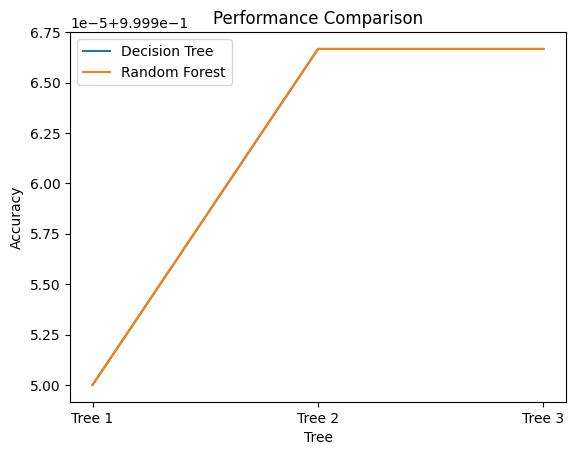

In [16]:
results = {
    'Tree': ['Tree 1', 'Tree 2', 'Tree 3'],
    'Accuracy_DT': [metrics_tree1['Accuracy'], metrics_tree2['Accuracy'], metrics_tree3['Accuracy']],
    'Accuracy_RF': [metrics_rf_tree1['Accuracy'], metrics_rf_tree2['Accuracy'], metrics_rf_tree3['Accuracy']],
}

plt.figure()
plt.plot(results['Tree'], results['Accuracy_DT'], label='Decision Tree')
plt.plot(results['Tree'], results['Accuracy_RF'], label='Random Forest')
plt.title('Performance Comparison')
plt.xlabel('Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The results overlap, and hence for the dataset, we dont find much of a difference in performance in the 2 models.